In [ ]:
!pip install pandas numpy matplotlib plotly seaborn wordcloud


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Furniture.csv')
df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [ ]:
df.tail()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944
2499,233.412894,172.474611,6,26.107505,55,9.502415,9,Desk,Glass,Green,Urban,Fall,Online,BrandC,-1692.339628


In [ ]:
df.shape

(2500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2500.0,274.495219,130.898452,50.704297,159.104890,277.641809,387.378046,499.872953
cost,2500.0,191.930107,98.590751,26.505895,106.399135,189.336329,263.188280,447.022911
sales,2500.0,24.924000,14.050067,1.000000,13.000000,25.000000,37.000000,49.000000
profit_margin,2500.0,30.208571,11.536804,10.017692,20.230697,30.297911,40.134205,49.999535
inventory,2500.0,97.715600,57.616228,0.000000,50.000000,94.000000,147.000000,199.000000
discount_percentage,2500.0,14.947616,8.621547,0.005556,7.760214,14.915143,22.292661,29.991229
delivery_days,2500.0,4.894000,2.559020,1.000000,3.000000,5.000000,7.000000,9.000000
revenue,2500.0,5926.853657,6902.737604,-14214.565505,1216.719195,5523.232714,10233.537982,32922.078832


<Axes: >

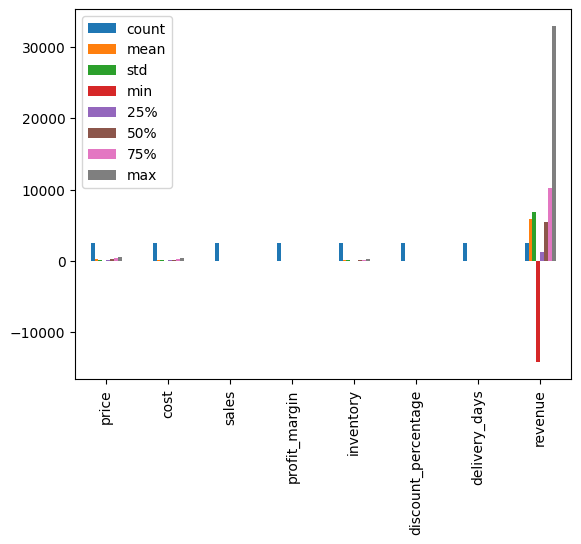

In [ ]:
df.describe().T.plot(kind='bar')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
price,0
cost,0
sales,0
profit_margin,0
inventory,0
discount_percentage,0
delivery_days,0
category,0
material,0
color,0


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined

# اختيار الأعمدة الرقمية فقط
numeric_df = df.select_dtypes(include=[float, int])

# حساب مصفوفة معامل الارتباط
correlation_matrix = numeric_df.corr()

# رسم خريطة حرارية لمصفوفة معامل الارتباط باستخدام Plotly
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

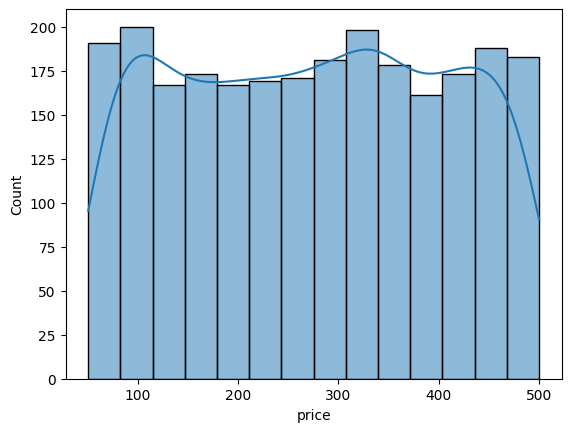

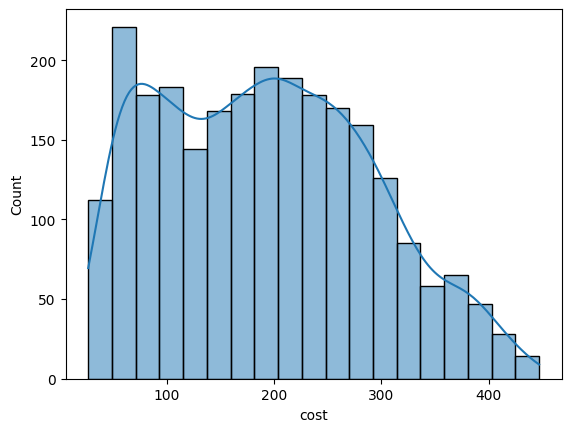

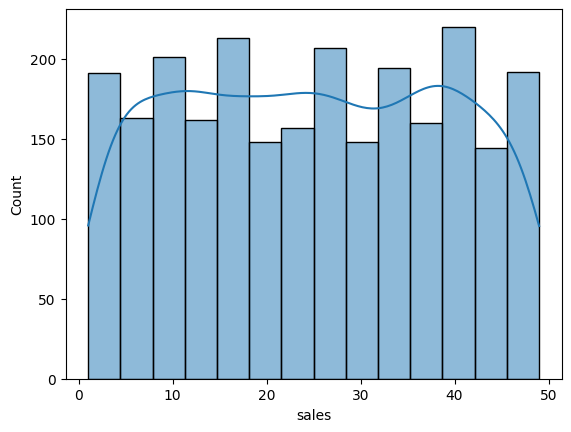

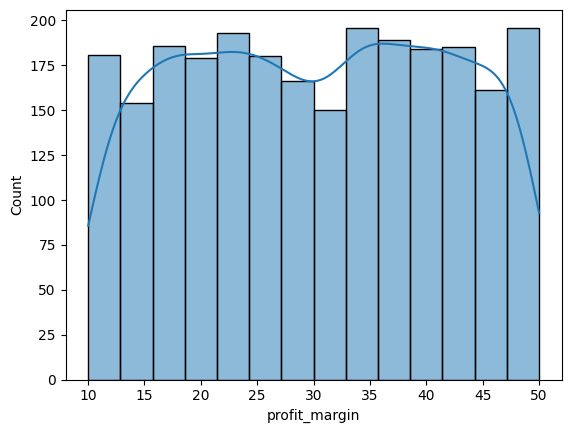

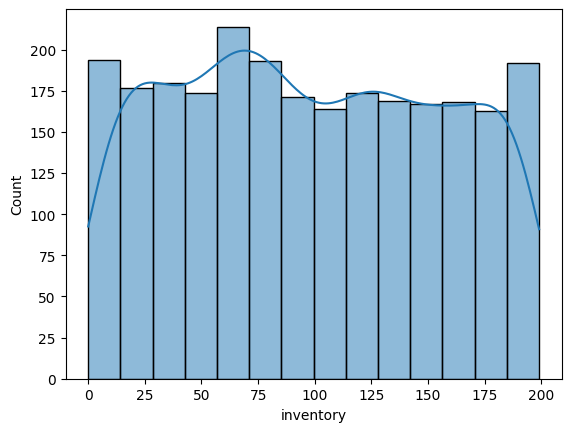

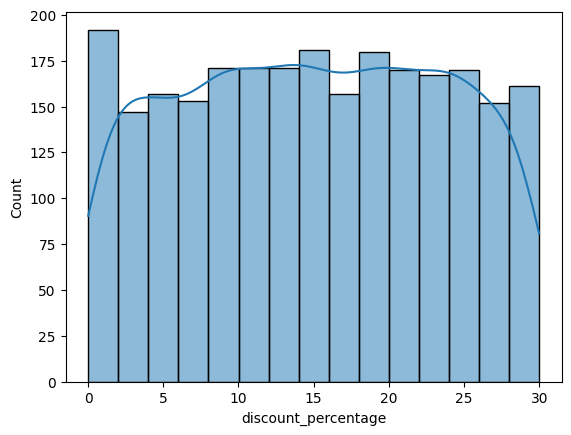

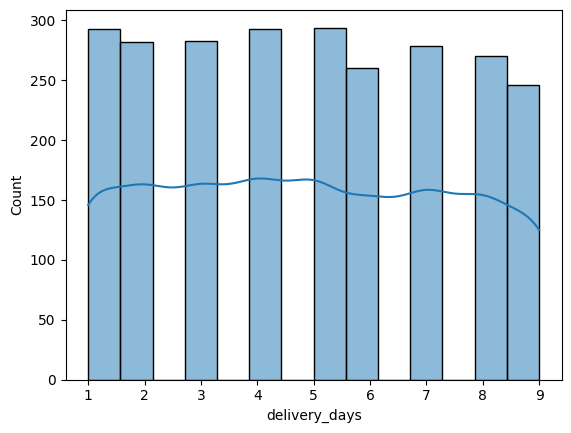

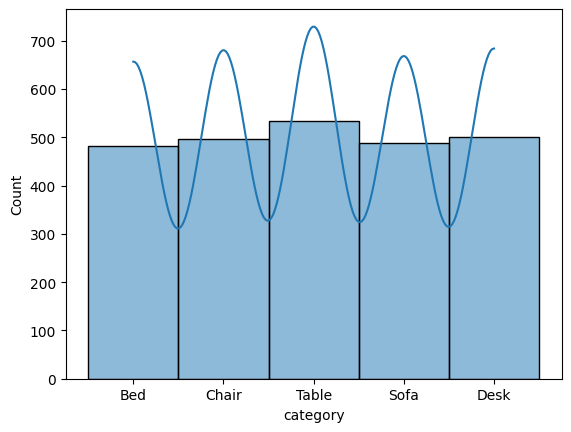

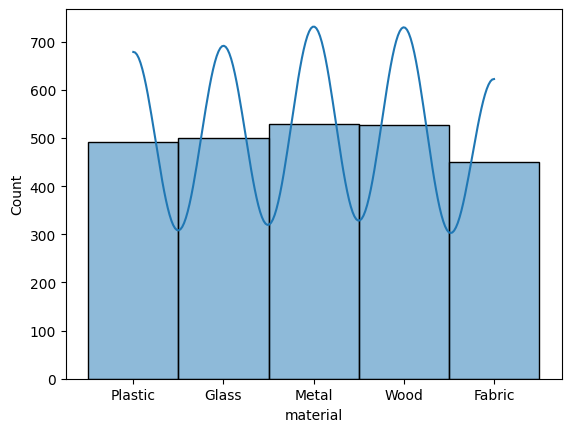

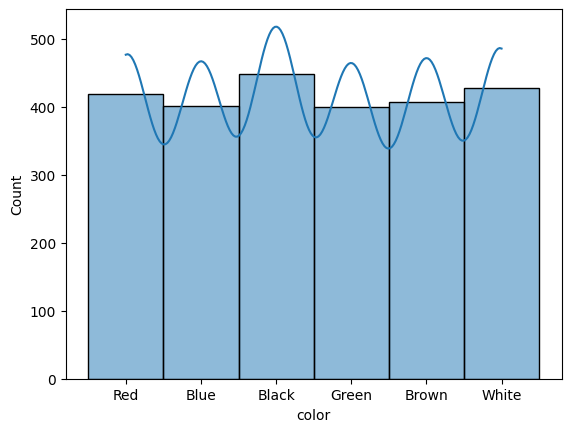

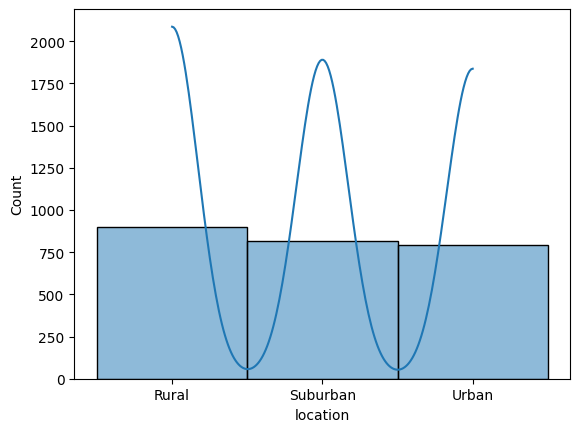

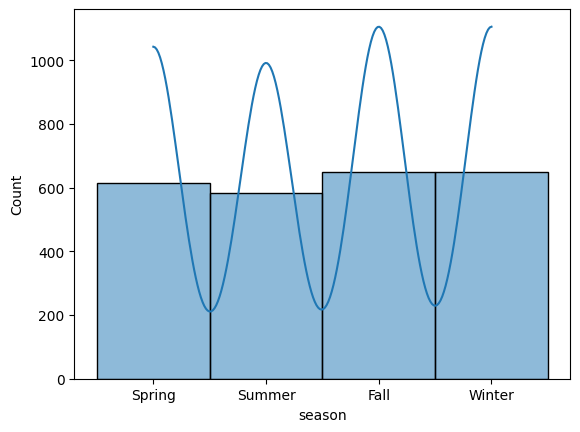

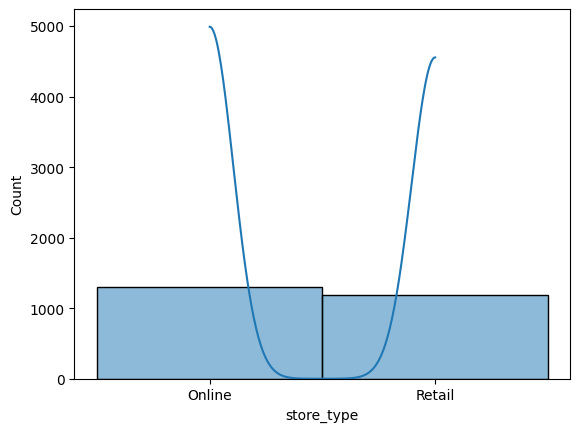

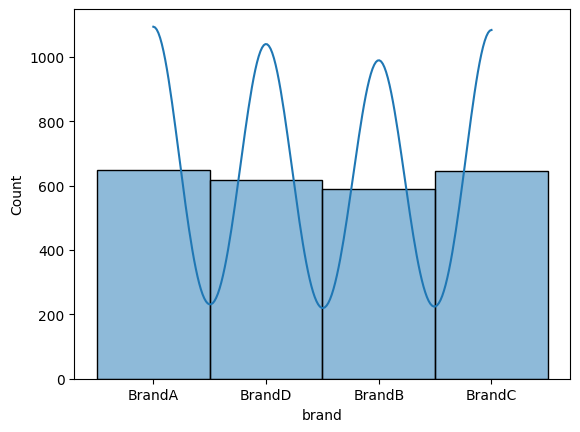

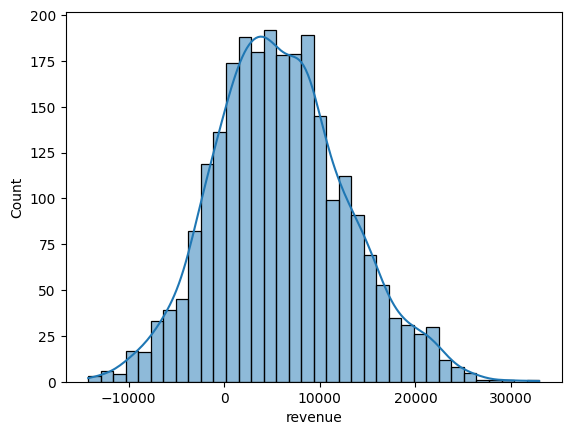

In [ ]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

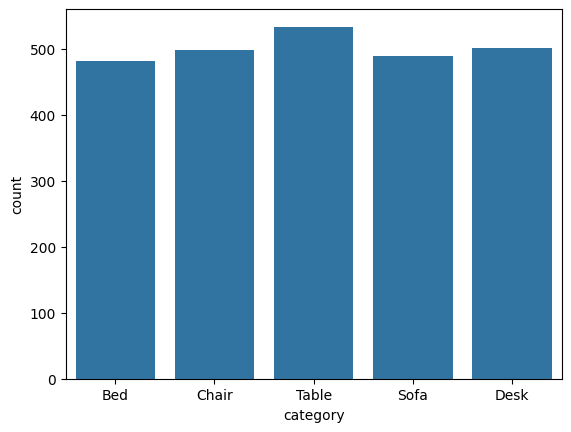

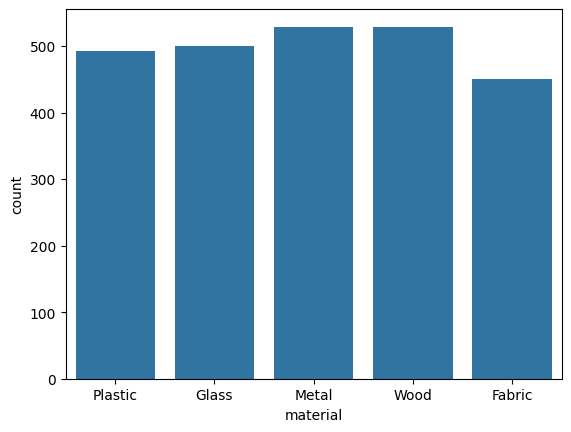

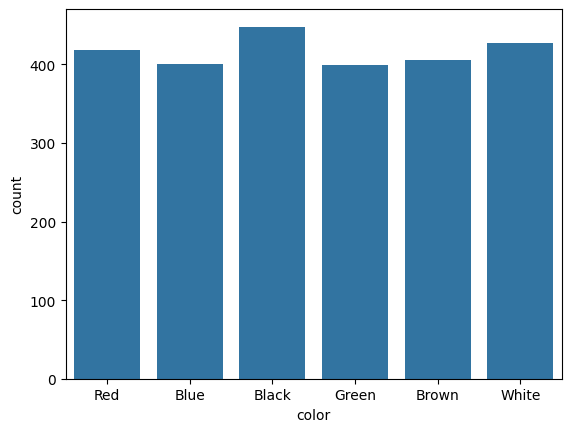

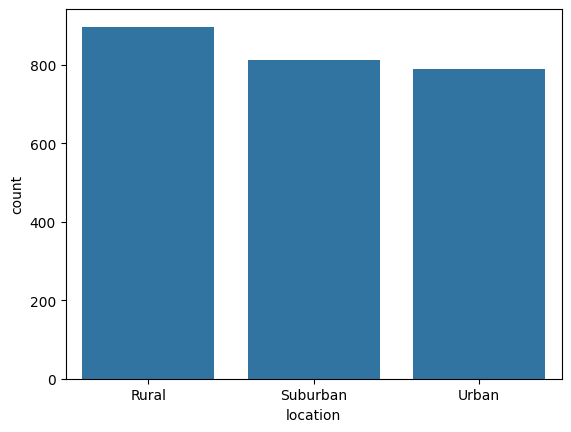

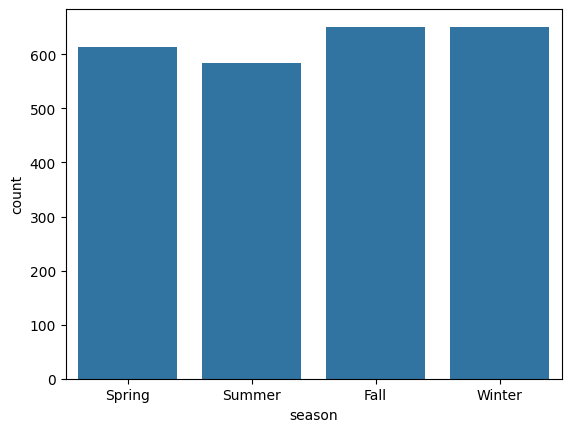

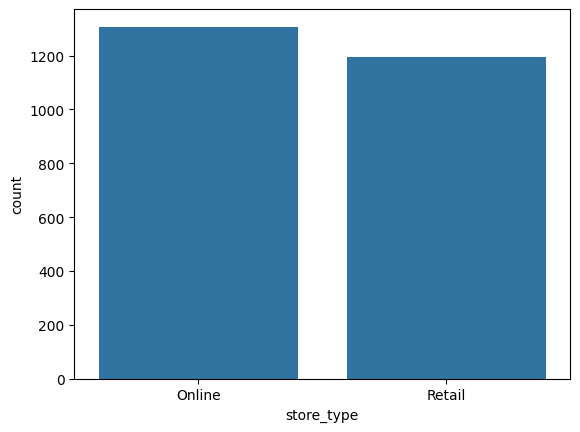

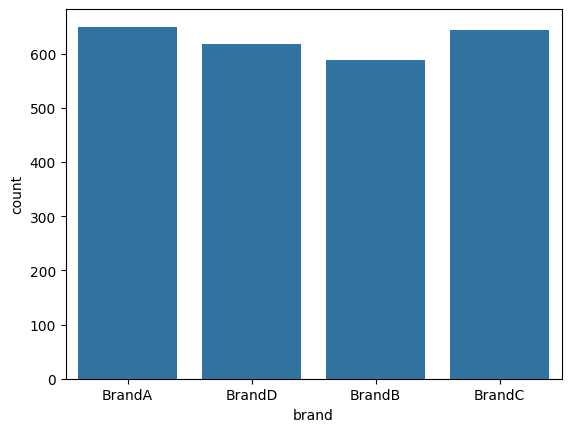

In [ ]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df)
        plt.show()

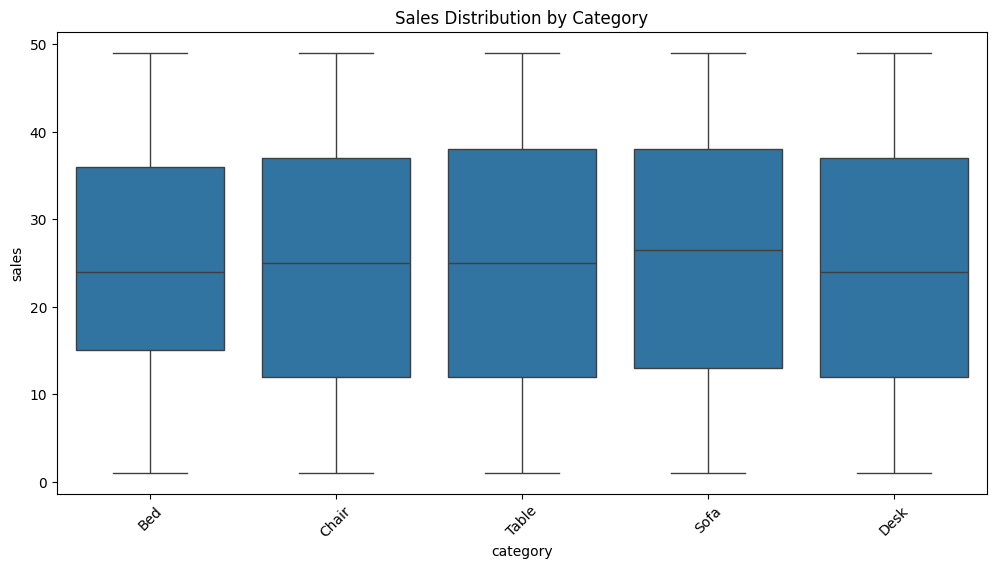

In [ ]:
# Sales distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='sales', data=df)
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.show()

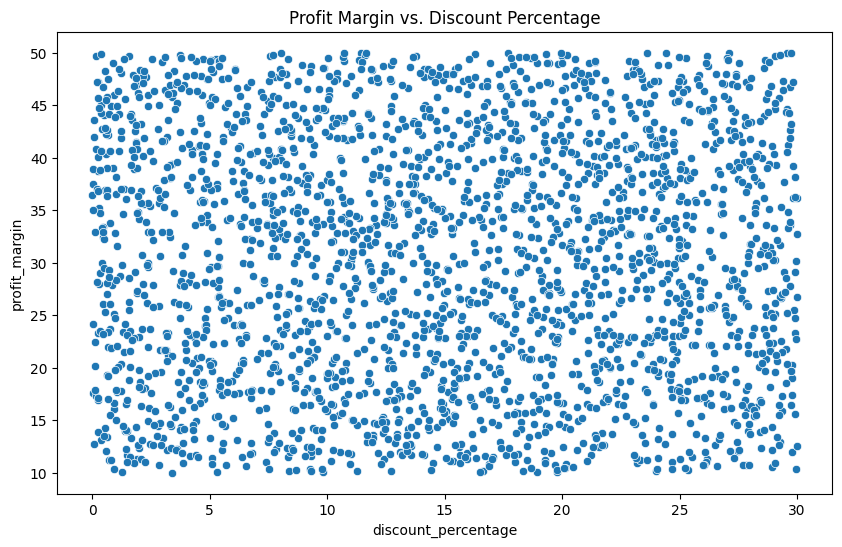

In [ ]:
# Scatter plot of profit margin vs. discount percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='profit_margin', data=df)
plt.title('Profit Margin vs. Discount Percentage')
plt.show()

In [ ]:
df.columns.tolist()

['price',
 'cost',
 'sales',
 'profit_margin',
 'inventory',
 'discount_percentage',
 'delivery_days',
 'category',
 'material',
 'color',
 'location',
 'season',
 'store_type',
 'brand',
 'revenue']

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['price',
 'cost',
 'sales',
 'profit_margin',
 'inventory',
 'discount_percentage',
 'delivery_days',
 'category',
 'material',
 'color',
 'location',
 'season',
 'store_type',
 'brand',
 'revenue']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [ ]:
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


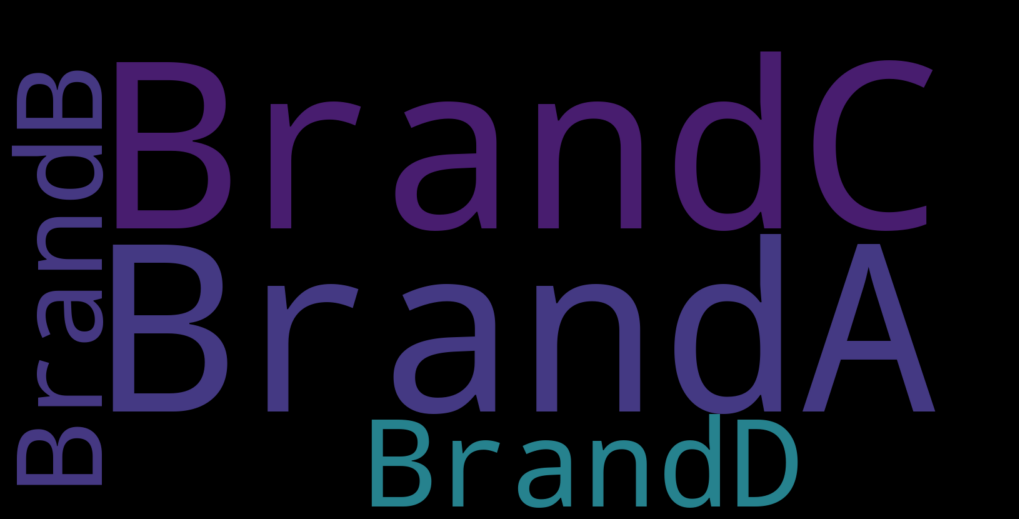

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["brand"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **Furniture Sales Data**
**A synthetic dataset of 2,500 rows featuring various furniture**


### **About Dataset**

This dataset is generated for the purpose of analyzing furniture sales data using multiple regression techniques. It contains 2,500 rows with 15 columns, including 7 numerical columns and 7 categorical columns, along with a target variable (revenue) which represents the total revenue generated from furniture sales. The dataset captures various aspects of furniture sales, such as pricing, cost, sales volume, discount percentage, inventory levels, delivery time, and different categorical attributes like furniture type, material, color, and store location.